<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Muhammad_Amin_Case_Study_Customer_Lifetime_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and Load Package

In [1]:
!pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.3 MB/s 


In [2]:
# numpy for array manipulation
import numpy as np
# pandas for dataframe manipulation
import pandas as pd
pd.set_option("display.max_columns", None)
# matplotlib for data visualization
import matplotlib.pyplot as plt

#split training set and test set
from sklearn.model_selection import train_test_split
# import regression model
from sklearn.linear_model import LinearRegression
# import metrics module from scikit-learn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# load lifetimes plotting module
from lifetimes.plotting import *
# load lifetimes utils module
from lifetimes.utils import *
# load BetaGeoFitter model
from lifetimes import BetaGeoFitter
# load GammaGammaFitter
from lifetimes import GammaGammaFitter

# seaborn for preety data visualization
import seaborn as sns

# import datetime for date manipulation
import datetime as dt

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

#Load Data

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_customers_dataset.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_geolocation_dataset.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_items_dataset.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_payments_dataset.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_reviews_dataset.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_orders_dataset.csv")
df7 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_products_dataset.csv")
df8 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_sellers_dataset.csv")
df9 = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/product_category_name_translation.csv")

#Join Data

##Check Dataset Before Join

In [4]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
df2.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
df3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
df4.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
df5.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
df6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
df7.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
df8.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
df9.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


After looking at 9 data heads, I just need a few columns to make RFM which stands for Recency (date column), frequency (order), and monetary (total payment by customer) which are order_purchase_timestamp for date, order_id for calculating frequency and payment_value which are the total payment of customer needs to pay (price + freight_value). We also need customer unique id to group by the RFM. So, I just will use 3 dataset, df1 (for customer unique id), df4 (for payment value), and df6 (for order id and purchase date).

In [13]:
#Check order status unique value
df6['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

I just need the order whwich has been delivered to customer, so I'll filter it.

In [14]:
#filter only delivered order status
df6_new = df6.query("order_status == 'delivered'")

##Join Customer Dataset with Filtered Order Dataset 

In [15]:
#Joining dataset
cust_data = pd.merge(df6_new, df1, on= 'customer_id', how= 'left')
cust_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [16]:
#Choose needed column for next step
cust_data = cust_data[['customer_id', 'customer_unique_id', 'order_id', 'order_purchase_timestamp']]
cust_data.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


##Join Joined Dataset with Payment Dataset

In [17]:
#Joining dataset
cust_new = pd.merge(cust_data, df4, on= 'order_id', how= 'left')
cust_new.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1.0,credit_card,1.0,18.12
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,3.0,voucher,1.0,2.00
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.0,voucher,1.0,18.59
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1.0,boleto,1.0,141.46
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1.0,credit_card,3.0,179.12


In [18]:
#Choose needed columns for RFM
df_final = cust_new[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'payment_value']]

#Data Inspection

In [19]:
#Check data structure
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100757 entries, 0 to 100756
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_unique_id        100757 non-null  object 
 1   order_id                  100757 non-null  object 
 2   order_purchase_timestamp  100757 non-null  object 
 3   payment_value             100756 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.8+ MB


I need to change the date type, and there's 1 missing value which I will inspect later.

In [20]:
#Change data type
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp']).dt.date
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100757 entries, 0 to 100756
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        100757 non-null  object        
 1   order_id                  100757 non-null  object        
 2   order_purchase_timestamp  100757 non-null  datetime64[ns]
 3   payment_value             100756 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.8+ MB


In [21]:
#Check for null value
df_final.isnull().sum()

customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
payment_value               1
dtype: int64

In [22]:
#Check row
df_final[pd.isnull(df_final['payment_value'])]

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
31175,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09-15,NaN


Because there's only one missing value I will drop it because in my opinion it will not affect that much to the modeling later.

In [23]:
#Drop missing value
df_final.dropna(axis= 0, inplace= True)

In [24]:
#Check duplicate values
df_final.duplicated().sum()

582

There'are 582 duplicate values which I will check

In [25]:
df_final[df_final.duplicated(keep=False)]

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
341,37d2d1ac62901f9a36cff32ca86c9337,d7f4e2f755cf2f40aa7c39804cfe01c4,2017-11-26,30.22
342,37d2d1ac62901f9a36cff32ca86c9337,d7f4e2f755cf2f40aa7c39804cfe01c4,2017-11-26,30.22
963,c375736396906dff8414217e02c45661,92a9ef7f0a0d392c9ad0d5f44e86b4ba,2018-03-25,25.00
965,c375736396906dff8414217e02c45661,92a9ef7f0a0d392c9ad0d5f44e86b4ba,2018-03-25,25.00
985,b14edf7220c5c77f27f11567178c24fb,06875ab72c5b9bb2eb303a70031bfeb0,2018-01-11,22.68
...,...,...,...,...
99881,caa8b91f5582eca3d032203ad5a11c32,5b03dc75d71e4a3940c88c4c9cdf6c2c,2018-04-25,20.00
100166,6b46cfed037b73c631cf418c96169857,aa61ca4def1d3385bafe461f6ef46faa,2017-02-24,53.96
100167,6b46cfed037b73c631cf418c96169857,aa61ca4def1d3385bafe461f6ef46faa,2017-02-24,53.96
100332,39b56719c0ea74b79ee77758001eb6ab,f4e88b3ce1eb899d388467aa702fdf93,2017-02-12,18.92


After looking at the duplicated values, I decide to drop those duplicated values because the order_id and also order_purchase_timestamp should be different.

In [26]:
#Drop duplicates
df_final.drop_duplicates(inplace=True, ignore_index=True)

#Data Exploration

In [27]:
df_final.describe()

,payment_value
count,100174.000000
mean,153.784057
std,214.837372
min,0.000000
25%,57.420000
50%,100.220000
75%,171.790000
max,13664.080000


There's payment value equals to zero, I'll check it.

In [28]:
#Check payment values equal to 0
df_final[df_final['payment_value'] == 0]

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
432,e4000306cf2f63714e6bb70dd20a6592,45ed6e85398a87c253db47c2d9f48216,2017-06-08,0.0
32559,677ad9cdca6c47c733f0cc6e23d7bb4c,6ccb433e00daae1283ccc956189c82ae,2017-10-26,0.0
86399,9077449283dc1319d5e51fb3159b28e2,b23878b3e8eb4d25a158f57d96331b18,2017-05-27,0.0
97672,cc5aa1b8337e394da54980226bb0f6d4,8bcbe01d44d147f901cd3192671144db,2018-01-24,0.0


There are 4 customer which has payment value zero with specific order_id. I'll cross check with the data.

In [29]:
#1st order_id
df3[df3["order_id"] == '45ed6e85398a87c253db47c2d9f48216']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
30803,45ed6e85398a87c253db47c2d9f48216,1,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-06-15 21:30:18,56.99,14.15


In [30]:
df4[df4["order_id"] == '45ed6e85398a87c253db47c2d9f48216'].sort_values("payment_sequential", ascending = True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
33781,45ed6e85398a87c253db47c2d9f48216,1,voucher,1,21.13
11755,45ed6e85398a87c253db47c2d9f48216,2,voucher,1,50.01
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00


In [31]:
#2nd order_id
df3[df3["order_id"] == '6ccb433e00daae1283ccc956189c82ae']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
47880,6ccb433e00daae1283ccc956189c82ae,1,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,2017-11-03 00:46:58,94.0,28.04


In [32]:
df4[df4["order_id"] == '6ccb433e00daae1283ccc956189c82ae'].sort_values("payment_sequential", ascending = True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
40546,6ccb433e00daae1283ccc956189c82ae,1,credit_card,5,84.67
93478,6ccb433e00daae1283ccc956189c82ae,2,voucher,1,14.65
92318,6ccb433e00daae1283ccc956189c82ae,3,voucher,1,22.72
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00


In [33]:
#3rd order_id
df3[df3["order_id"] == 'b23878b3e8eb4d25a158f57d96331b18']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
78308,b23878b3e8eb4d25a158f57d96331b18,1,e306ca54c91b21392317d5b4632c9fe3,e49c26c3edfa46d227d5121a6b6e4d37,2017-06-01 19:35:17,135.3,36.27


In [34]:
df4[df4["order_id"] == 'b23878b3e8eb4d25a158f57d96331b18'].sort_values("payment_sequential", ascending = True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
44891,b23878b3e8eb4d25a158f57d96331b18,1,credit_card,1,35.98
55494,b23878b3e8eb4d25a158f57d96331b18,2,voucher,1,122.79
72011,b23878b3e8eb4d25a158f57d96331b18,3,voucher,1,12.80
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00


In [35]:
#4th order_id
df3[df3["order_id"] == '8bcbe01d44d147f901cd3192671144db']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16


In [36]:
df4[df4["order_id"] == '8bcbe01d44d147f901cd3192671144db'].sort_values("payment_sequential", ascending = True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00


Customers who had payment value equals to 0 was using payment type voucher and had payment sequential more than one. 3 out of 4 customers were using payment type credit_card then using voucher. I will drop the 0 payment value because the customer pay the actual price + freight value but using multiple payment type.

In [37]:
df_final = df_final[(df_final["payment_value"]>0)]

In [38]:
df_final.describe()

,payment_value
count,100170.000000
mean,153.790198
std,214.839464
min,0.010000
25%,57.430000
50%,100.225000
75%,171.790000
max,13664.080000


**Check The First And Last Date**

In [39]:
#Check first date
df_final['order_purchase_timestamp'].min()

Timestamp('2016-10-03 00:00:00')

In [40]:
#Check last date
df_final['order_purchase_timestamp'].max()

Timestamp('2018-08-29 00:00:00')

#Modeling Using Lifetimes

In [41]:
df = summary_data_from_transaction_data(
    df_final,
    'customer_unique_id', 
    'order_purchase_timestamp', 
    monetary_value_col='payment_value', 
    observation_period_end='2018-08-29'
)

In [42]:
df.head()

,frequency,recency,T,monetary_value
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,111.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,114.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,537.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,321.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,288.0,0.0


There are 93357 customers under our analysis.
Customer unique id `0000366f3b9a7992bf8c76cfdf3221e2` made 1 purchase only (no repeat), so the frequency and recency are 0, and the age is 111 days (e.g. the duration between the first purchase and the end of the period in the analysis).

Check Summary and Distribution of `frequency`

Text(0.5, 1.0, 'Frequency')

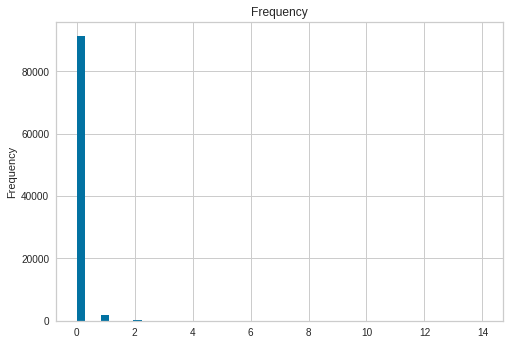

In [43]:
df['frequency'].plot(kind='hist', bins=50)
plt.title('Frequency')

In [44]:
print(df['frequency'].describe())

count    93357.000000
mean         0.023887
std          0.177241
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: frequency, dtype: float64


In [45]:
df['frequency'].value_counts()

0.0     91342
1.0      1864
2.0       120
3.0        17
4.0         6
5.0         5
6.0         2
14.0        1
Name: frequency, dtype: int64

There is an oulier which customer did transaction in the platform until 14 times. Most of customers, specifically speaking, 91,342 customers only did 1 transaction in the past and never come back.

In [46]:
#Percentage of frequency equals to 0 in this dataset
print(sum(df['frequency'] == 0)*100/float(len(df_final)))

91.18698213037835


Check Summary and Distribution of `recency`

Text(0.5, 1.0, 'Recency')

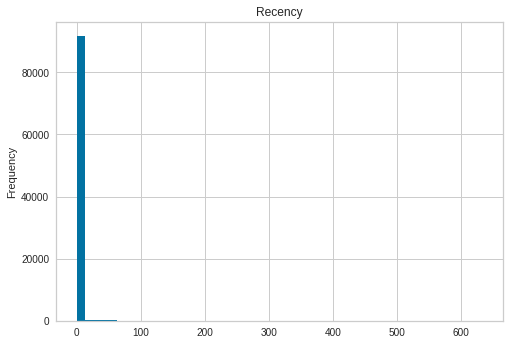

In [47]:
df['recency'].plot(kind='hist', bins=50)
plt.title('Recency')

In [48]:
print(df['recency'].describe())

count    93357.000000
mean         2.645115
std         25.007557
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        633.000000
Name: recency, dtype: float64


In [49]:
df['recency'].value_counts()

0.0      91342
1.0         40
2.0         35
6.0         29
3.0         26
         ...  
279.0        1
382.0        1
360.0        1
433.0        1
322.0        1
Name: recency, Length: 418, dtype: int64

There are a few customers who has recency more than 600 days which mean they are never comeback again to do transaction in olist almost 2 years. According to the plot above, because the most frequency is 0, which has 91,342, that's why the recency is also 0. It means they were just experimenting to do transaction in olist platform.

In [50]:
print(sum(df['recency'] == 0) * 100/float(len(df_final)))

91.18698213037835


Among all customers in our data, more than 90% of them only did transaction once (no repeat).


# Frequency/Recency Analysis Using The BG/NBD Model

In [51]:
df = df.query('frequency > 0')

In [90]:
bgf = BetaGeoFitter(penalizer_coef=5)
bgf.fit(df['frequency'], df['recency'], df['T'])

<lifetimes.BetaGeoFitter: fitted with 2015 subjects, a: 0.04, alpha: 7.91, b: 0.00, r: 0.22>

In [91]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.221915,0.004440,0.213213,0.230618
alpha,7.908177,0.536232,6.857163,8.959191
a,0.035149,0.005542,0.024287,0.046012
b,0.004430,0.000794,0.002874,0.005986


## Visualizing frequency/recency matrix


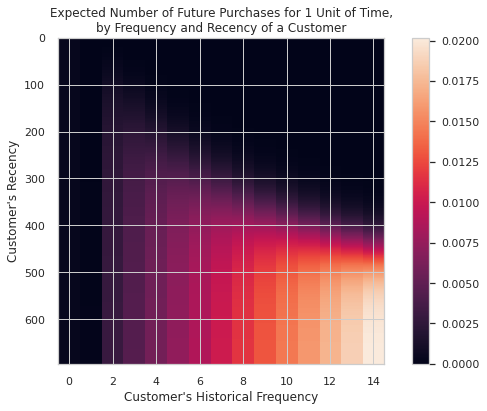

In [92]:
fig = plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(bgf)
plt.show()

Based on visualization above, if a customer has made 14 purchases, and their latest purchase was when they were approximately 600 days old, then they are our best customer (bottom-right).

Customers that only purchased once in olist platform, probably will not purchase anymore in the future.


Customers who purchased frequently will likely to be the best customers in the future.


Customers who purchased frequently yet not recently (top-right corner), have probably gone or churn.


Another type of customers that around (4, 200) that represents the customer who buys infrequently, and we have not seen them recently, therefore they might buy again in the future. However, we are not sure if they have gone or just between purchases.

The probability of still being alive:

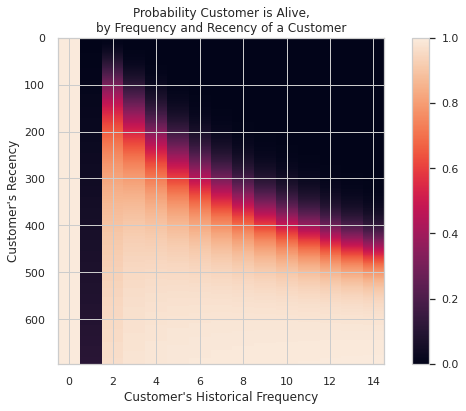

In [93]:
fig = plt.figure(figsize=(10,6))
plot_probability_alive_matrix(bgf)
plt.show()

I'm not sure about this graph. This graph tells that the less freuqent (under 1 time), the more probably customer to alive. The recency on 0 frequency seems absurd. It may be influenced by the data distribution which mostly distributed at 1. Yet after 1 frequency, the graphic seems to be normal where:

- Customers who recently have transaction are almost surely “alive”.
- Customers who frequently have transaction in olist but not recently, are likely to churn. And the more they bought in the past, the more likely they have churned. They are represented in the upper-right.

##Repeat transaction for 7 days ahead

In [56]:
# pick period
t = 7
# predict purchases
df_7 = df
df_7['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df_7['frequency'], df_7['recency'], df_7['T']
)

In [57]:
df_7['prob_alive'] = bgf.conditional_probability_alive(
    df_7['frequency'], df_7['recency'], df_7['T']
)

In [58]:
df.sort_values(by='predicted_purchases', ascending = False).head(5)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_unique_id,,,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,14.0,428.0,437.0,59.108571,0.222041,0.995055
e0836a97eaae86ac4adc26fbb334a527,2.0,62.0,64.0,32.955000,0.202311,0.951343
bc3e7032668d3f411c227eec09221362,2.0,59.0,75.0,72.535000,0.172131,0.928530
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,0.149013,0.916302
ca77025e7201e3b30c44b472ff346268,6.0,235.0,324.0,138.941667,0.122895,0.937001


From table above, there are top 5 customers who are probably to purchase in olist platform for 7 days ahead. As we can see in 7 days ahead, the top 5 customers will less likely to do transaction according to predicted_purchases which not exceed 1 even though they have probability to alive around 90-99%.

##Repeat transaction for 14 days ahead

In [59]:
# pick period
t = 14
# predict purchases
df_14 = df
df_14['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df_14['frequency'], df_14['recency'], df_14['T']
)

In [60]:
df_14['prob_alive'] = bgf.conditional_probability_alive(
    df_14['frequency'], df_14['recency'], df_14['T']
)

In [61]:
df_14.sort_values(by='predicted_purchases', ascending = False).head(5)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_unique_id,,,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,14.0,428.0,437.0,59.108571,0.443902,0.995055
e0836a97eaae86ac4adc26fbb334a527,2.0,62.0,64.0,32.955000,0.403329,0.951343
bc3e7032668d3f411c227eec09221362,2.0,59.0,75.0,72.535000,0.343290,0.928530
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,0.297279,0.916302
ca77025e7201e3b30c44b472ff346268,6.0,235.0,324.0,138.941667,0.245643,0.937001


As we can see in 14 days ahead, the top 5 customers will also less likely to do transaction according to predicted_purchases which not exceed 1 even though they have probability to alive around 90-99%.

##Repeat transaction for 30 days ahead

In [62]:
# pick period
t = 30
# predict purchases
df_30 = df
df_30['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df_30['frequency'], df_30['recency'], df_30['T']
)

In [63]:
df_30['prob_alive'] = bgf.conditional_probability_alive(
    df_30['frequency'], df_30['recency'], df_30['T']
)

In [64]:
df_30.sort_values(by='predicted_purchases', ascending = False).head(5)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_unique_id,,,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,14.0,428.0,437.0,59.108571,0.950357,0.995055
e0836a97eaae86ac4adc26fbb334a527,2.0,62.0,64.0,32.955000,0.858673,0.951343
bc3e7032668d3f411c227eec09221362,2.0,59.0,75.0,72.535000,0.731348,0.928530
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,0.633703,0.916302
ca77025e7201e3b30c44b472ff346268,6.0,235.0,324.0,138.941667,0.525684,0.937001


From table above, we can see that customer `8d50f5eadf50201ccdcedfb9e2ac8455` will likely to purchase in olist at least once in 30 days ahead with probability to alive 99%.

##Repeat transaction for 60 days ahead

In [65]:
# pick period
t = 60
# predict purchases
df_60 = df
df_60['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df_60['frequency'], df_60['recency'], df_60['T']
)

In [66]:
df_60['prob_alive'] = bgf.conditional_probability_alive(
    df_60['frequency'], df_60['recency'], df_60['T']
)

In [67]:
df_60.sort_values(by='predicted_purchases', ascending = False).head(5)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_unique_id,,,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,14.0,428.0,437.0,59.108571,1.897594,0.995055
e0836a97eaae86ac4adc26fbb334a527,2.0,62.0,64.0,32.955000,1.700230,0.951343
bc3e7032668d3f411c227eec09221362,2.0,59.0,75.0,72.535000,1.449396,0.928530
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,1.256885,0.916302
ca77025e7201e3b30c44b472ff346268,6.0,235.0,324.0,138.941667,1.048892,0.937001


As we can see in 60 days ahead, the top 5 customers will also likely to do transaction at least 1 time with probability to alive around 90-99%.

###Assessing model fit

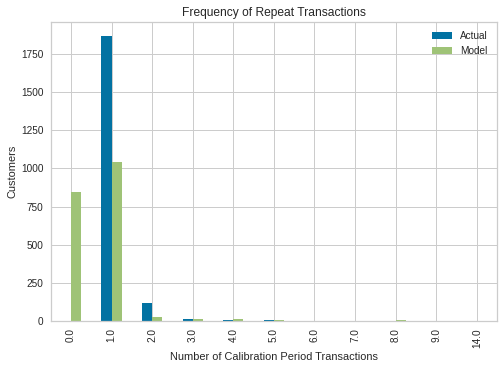

In [68]:
plot_period_transactions(bgf, max_frequency=10)

We can see that actual data and my model data has a bad match or is not fit well.


We will test our data just like cross-validation in machine learning practice, which to know how my model performs by parting the dataset into a calibration period dataset and holdout dataset.

###More model fitting

In [69]:
pd.get_option("display.max_columns")
summary_cal_holdout = calibration_and_holdout_data(
    df_final, 'customer_unique_id', 'order_purchase_timestamp',
    calibration_period_end='2018-02-28',
    observation_period_end='2018-08-29'
)

In [70]:
print(summary_cal_holdout.head())

                                  frequency_cal  recency_cal  T_cal  \
customer_unique_id                                                    
0000f46a3911fa3c0805444483337064            0.0          0.0  355.0   
0000f6ccb0745a6a4b88665a16c9f078            0.0          0.0  139.0   
0004aac84e0df4da2b147fca70cf8255            0.0          0.0  106.0   
00053a61a98854899e70ed204dd4bafe            0.0          0.0    0.0   
0005e1862207bf6ccc02e4228effd9a0            0.0          0.0  361.0   

                                  frequency_holdout  duration_holdout  
customer_unique_id                                                     
0000f46a3911fa3c0805444483337064                0.0             182.0  
0000f6ccb0745a6a4b88665a16c9f078                0.0             182.0  
0004aac84e0df4da2b147fca70cf8255                0.0             182.0  
00053a61a98854899e70ed204dd4bafe                0.0             182.0  
0005e1862207bf6ccc02e4228effd9a0                0.0             182.0 

In [71]:
bgf = BetaGeoFitter(penalizer_coef=2)

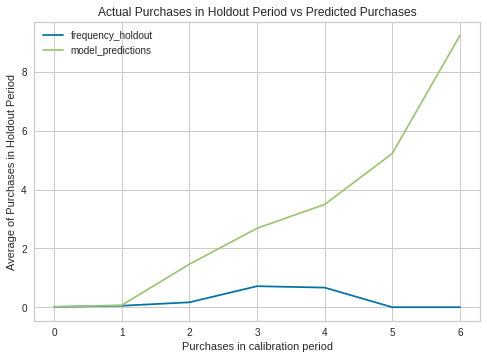

In [72]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

As we know, this model is fast but not accurate, in contrast to the Pareto model which is slow but accurate. This model is not able to predict the customer base's behaviour. In my opinion I think this model doesn't fit with this dataset.

# Estimating CLV using Gamma-Gamma Model of Monetary Value

I will try to estimate the economic value using Gamma-Gamma submodel by using summary data transactional data from earlier which has economic values for each transaction.

I will remove the customers which did not buy anything in calibration period and their monetary value in the summary dataset equals to zero. After that I can build the Gamma-Gamma model. I am only estimating the customers who had at least one repeat purchase with us. Therefore, we are estimating for 2,015 customers.

In [73]:
summary = df[df['frequency']>0]
print(summary.head())
print()
print('\nCustomers with atleast 1 repeat purchase\n', len(summary))

                                  frequency  recency      T  monetary_value  \
customer_unique_id                                                            
004288347e5e88a27ded2bb23747066c        1.0    171.0  398.0          103.28   
00a39521eb40f7012db50455bf083460        1.0     11.0   98.0           26.78   
011575986092c30523ecb71ff10cb473        1.0     60.0  193.0           80.32   
011b4adcd54683b480c4d841250a987f        1.0    177.0  372.0          149.88   
012452d40dafae4df401bced74cdb490        1.0    330.0  437.0          340.07   

                                  predicted_purchases  prob_alive  
customer_unique_id                                                 
004288347e5e88a27ded2bb23747066c             0.007921    0.042724  
00a39521eb40f7012db50455bf083460             0.010818    0.015741  
011575986092c30523ecb71ff10cb473             0.011652    0.031505  
011b4adcd54683b480c4d841250a987f             0.009527    0.048137  
012452d40dafae4df401bced74cdb490      

### The Gamma-Gamma Model And The Independence Assumption


The Gamma-Gamma submodel, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we will need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [74]:
summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.002335
frequency,0.002335,1.000000


Because there isn't any correlation between monetary value and frequency, I can use the summary to estimate CLV. I will train Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.


In [75]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(summary['frequency'],
        summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2015 subjects, p: 5.83, q: 2.83, v: 47.69>


After applying Gamma-Gamma model, I'll estimate the average transaction value for each customer.

In [76]:
print(ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).head(10))

customer_unique_id
004288347e5e88a27ded2bb23747066c     114.991558
00a39521eb40f7012db50455bf083460      56.724500
011575986092c30523ecb71ff10cb473      97.503824
011b4adcd54683b480c4d841250a987f     150.484956
012452d40dafae4df401bced74cdb490     295.345242
012a218df8995d3ec3bb221828360c86    1130.049420
013ef03e0f3f408dd9bf555e4edcdc0a      88.935139
013f4353d26bb05dc6652f1269458d8d     161.270074
015557c9912277312b9073947804a7ba      91.852300
0178b244a5c281fb2ade54038dd4b161     156.563010
dtype: float64


In [77]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).mean(),
    summary[summary['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 151.14106574728606, Average profit: 150.70322451849228


In [78]:
# refit the BG model to the summary_with_money_value dataset 
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
CLV = ggf.customer_lifetime_value( 
    bgf, #the model to use to predict the number of future transactions 
    summary['frequency'], 
    summary['recency'], 
    summary['T'], 
    summary['monetary_value'], 
    time=12, # months 
    discount_rate=0.01 # monthly discount rate ~ 1% monthly
)
print(CLV.head(10))

customer_unique_id
004288347e5e88a27ded2bb23747066c      4.947589
00a39521eb40f7012db50455bf083460      3.388860
011575986092c30523ecb71ff10cb473      6.074692
011b4adcd54683b480c4d841250a987f      7.798212
012452d40dafae4df401bced74cdb490     22.501651
012a218df8995d3ec3bb221828360c86    144.282437
013ef03e0f3f408dd9bf555e4edcdc0a     21.259880
013f4353d26bb05dc6652f1269458d8d      0.694579
015557c9912277312b9073947804a7ba      0.421570
0178b244a5c281fb2ade54038dd4b161     14.043499
Name: clv, dtype: float64


I have already found the CLV of each customer which has frequency at least 1 with the result only 2,015 customers. The customers with 0 frequency means that they are only do transaction once and never engage with olist platform again.
With the 2,015 customers which I have been calculated their CLV, I'll try to make segmentation by using their CLV score.

#Segmenting by CLV


In [79]:
#Change the series to dataframe
CLV.to_frame()

,clv
customer_unique_id,
004288347e5e88a27ded2bb23747066c,4.947589
00a39521eb40f7012db50455bf083460,3.388860
011575986092c30523ecb71ff10cb473,6.074692
011b4adcd54683b480c4d841250a987f,7.798212
012452d40dafae4df401bced74cdb490,22.501651
...,...
fe81bb32c243a86b2f86fbf053fe6140,1504.170799
fed519569d16e690df6f89cb99d4e682,6.453597
ff03923ad1eb9e32304deb7f9b2a45c9,10.514192


In [80]:
#Join the summary data with CLV data
clv_merged = pd.merge(summary, CLV, on= 'customer_unique_id', how= 'left')
clv_merged.head()

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive,clv
customer_unique_id,,,,,,,
004288347e5e88a27ded2bb23747066c,1.0,171.0,398.0,103.28,0.007921,0.042724,4.947589
00a39521eb40f7012db50455bf083460,1.0,11.0,98.0,26.78,0.010818,0.015741,3.388860
011575986092c30523ecb71ff10cb473,1.0,60.0,193.0,80.32,0.011652,0.031505,6.074692
011b4adcd54683b480c4d841250a987f,1.0,177.0,372.0,149.88,0.009527,0.048137,7.798212
012452d40dafae4df401bced74cdb490,1.0,330.0,437.0,340.07,0.013761,0.081257,22.501651


In [81]:
clv_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
frequency,2015.0,1.106700,0.507178,1.000000,1.000000,1.000000,1.000000,14.000000
recency,2015.0,122.550868,119.526654,1.000000,25.000000,81.000000,187.500000,633.000000
T,2015.0,313.680397,146.804449,7.000000,196.500000,315.000000,432.000000,695.000000
monetary_value,2015.0,150.703225,159.364610,11.560000,62.590000,108.120000,179.220000,2405.280000
predicted_purchases,2015.0,0.042671,0.128489,0.000073,0.003089,0.009346,0.020010,1.897594
prob_alive,2015.0,0.093224,0.202819,0.000671,0.012190,0.035937,0.073396,0.995055
clv,2015.0,34.168227,115.627229,0.030178,2.065822,6.092927,15.875241,1840.045285


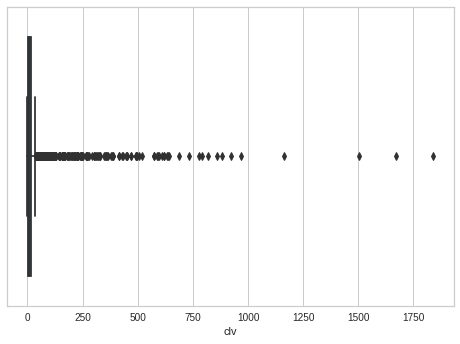

In [82]:
sns.boxplot(data=clv_merged, x="clv");

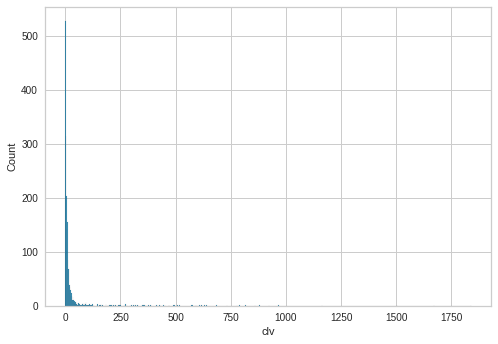

In [83]:
sns.histplot(data=clv_merged, x="clv");

According to clv summary the resulting median of clv is around 6 in contrast with its mean which is 34. Low clv means that the customers has high churn rate or low purchase frequency and average order value. And its vice versa for high clv.

I will divide segmentation into 3, which low tier, mid tier, and high tier. The ranges are 0-250 will be the low clv, 251-1250 will be mid clv, and the rest is high clv.

The reason I choose to use 3 segmentations and why I divide them like that because the mean and even the 3rd quartile is still below 20% maximum clv recorded. I will label this range low as `nearly inactive` customer. Which still can be treated if olist platform wants to.

Then the mid level will be the active ones which in the range 251-1250 of max clv recorded. I choose the range 251-1250 because data spread around that range.

The last will be the most valuable customer for olist which has the highest clv.

In [84]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(clv_merged[["clv"]])
clv_merged["scaled_clv"] = scaler.transform(clv_merged[["clv"]])
clv_merged.sort_values(by="scaled_clv", ascending=False).head()

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive,clv,scaled_clv
customer_unique_id,,,,,,,,
397b44d5bb99eabf54ea9c2b41ebb905,3.0,157.0,230.0,489.963333,0.750793,0.927013,1840.045285,1.000000
297ec5afd18366f5ba27520cc4954151,2.0,85.0,194.0,701.160000,0.519074,0.786753,1671.269946,0.908275
fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,311.0,381.745000,0.758535,0.956794,1504.170799,0.817461
4facc2e6fbc2bffab2fea92d2b4aa7e4,3.0,421.0,437.0,532.320000,0.425185,0.973556,1163.133324,0.632116
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,1.256885,0.916302,966.451478,0.525225


In [85]:
# Divide customers into 3 groups
labels=["Low", "Mid", "High"]
clv_merged["tier"] = pd.cut(clv_merged["scaled_clv"], [0, .136, .81, 1.1], labels = labels)

In [86]:
#Sort [most valuable to least valuable]
clv_merged[["frequency", "recency", "T", "monetary_value", "prob_alive", "clv", "tier"]].sort_values(by="clv",ascending=False).head()

,frequency,recency,T,monetary_value,prob_alive,clv,tier
customer_unique_id,,,,,,,
397b44d5bb99eabf54ea9c2b41ebb905,3.0,157.0,230.0,489.963333,0.927013,1840.045285,High
297ec5afd18366f5ba27520cc4954151,2.0,85.0,194.0,701.160000,0.786753,1671.269946,High
fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,311.0,381.745000,0.956794,1504.170799,High
4facc2e6fbc2bffab2fea92d2b4aa7e4,3.0,421.0,437.0,532.320000,0.973556,1163.133324,Mid
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,0.916302,966.451478,Mid


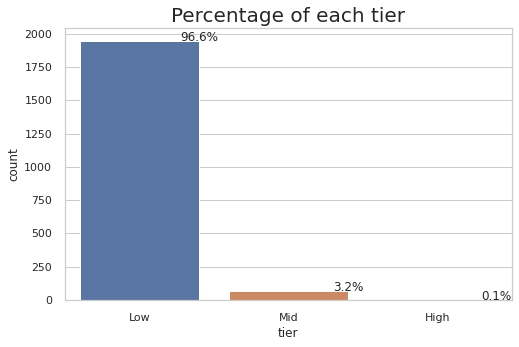

In [87]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(clv_merged))
ax = sns.countplot(x="tier", data=clv_merged)
plt.title('Percentage of each tier', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


There are 96.6% of customers in low tier which mean they are nearly inactive and needs treatment. 3.2% are in mid tier which they are active and profitable for olist platform. The last 0.1% which is only 3 people are the most valuable customers for olist platform.

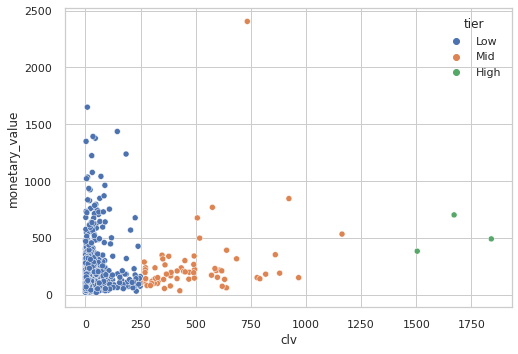

In [88]:
sns.scatterplot(data=clv_merged, x="clv", y="monetary_value", hue="tier");

##Recommendations


---



*   Make loyalty program which is possible to make the `nearly inactive` customers more engage with olist platform and make the `inactive` customers retain.
*   Optimize upsell and cross sell for the same category products to increase average value of sale.
*    Do better complaint management in order to increase number of transaction or retention time period and decrease customer churn rate.

